In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [37]:
class Datagen:
    def __init__(self,dim,mod,means,stddev,num_points):
        self.dim = dim
        self.mod = mod
        self.means = means
        self.stddev = stddev
        self.num_points = num_points
        self.ids = np.arange(1,self.mod*self.num_points + 1,1)
    
    def reshape_means(self):
        self.means = np.array(self.means).reshape(self.mod,self.dim)
    
    def reshape_stddev(self):
        self.stddev = np.array(self.stddev).reshape(self.mod,self.dim)

    def generate_gaussian(self):        
        pointsarr = []
        for row in range(self.mod):
            pointsarr.append(np.random.multivariate_normal(self.means[row],np.diag(self.stddev[row]),self.num_points))
        pointsarr = np.concatenate(pointsarr)
        return pointsarr  
    
    def totensor(self,numpyobj):
        return torch.tensor(numpyobj)
    
    def standardize(self,arr):        
        arr[:,0] = (arr[:,0]-torch.min(arr[:,0]))/(torch.max(arr[:,0]) - torch.min(arr[:,0]))
        arr[:,1] = (arr[:,1]-torch.min(arr[:,1]))/(torch.max(arr[:,1]) - torch.min(arr[:,1]))
        return arr

In [38]:
dim = 2
mod = 1
means = [0,0]
stddev = [1,1]
points = 500

In [39]:
d_obj = Datagen(dim,mod,means,stddev,points)
d_obj.reshape_means()
d_obj.reshape_stddev()
pointsarr = d_obj.totensor(d_obj.generate_gaussian())

In [40]:
pointsarr = d_obj.standardize(pointsarr)

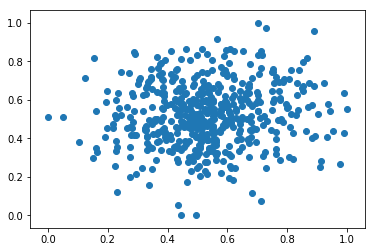

In [41]:
p = plt.scatter(pointsarr[:,0],pointsarr[:,1])

In [42]:
for ind,data in enumerate(pointsarr):
    torch.save(pointsarr[ind], 'data/' + str(ind+1) + '.pt')

In [67]:
# means = np.array(means).reshape((mod,dim))
# stddev = np.array(stddev).reshape((mod,dim))

In [69]:
# l = []
# for row in range(mod):
#     l.append(np.random.multivariate_normal(means[row],np.diag(stddev[row]),points))

In [124]:
# (pointsarr[:,0]-torch.min(pointsarr[:,0]))/(torch.max(pointsarr[:,0]) - torch.min(pointsarr[:,0]))

In [8]:
# pointsarr = torch.sigmoid(pointsarr)

In [130]:
# plt.savefig('actual_data.png')

In [129]:
# plt.hist(pointsarr[:,0],10)
# plt.show()

In [70]:
# l_tens = torch.tensor(l_cat)
# l_tens2 = torch.from_numpy(l_cat)